<a href="https://colab.research.google.com/github/rahul25012003/TU-DORTMUND-PROJECT/blob/main/TU_DORTMUND_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols






















In [27]:
# Load the data
df = pd.read_csv('sandwich.csv')

In [28]:
# View first few rows
print(df.head())

   antCount        bread           topping butter
0        34          Rye  Ham and gherkins     no
1        47  Multi Grain     Peanut butter    yes
2        67        White  Ham and gherkins    yes
3        63  Multi Grain  Ham and gherkins    yes
4        65          Rye  Ham and gherkins     no


In [29]:
# Check dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   antCount  48 non-null     int64 
 1   bread     48 non-null     object
 2   topping   48 non-null     object
 3   butter    48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB
None


In [30]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
antCount    0
bread       0
topping     0
butter      0
dtype: int64


In [31]:
# Summary statistics for the number of ants
print("\nSummary Statistics (Ants Count):")
print(df['antCount'].describe())


Summary Statistics (Ants Count):
count    48.000000
mean     43.500000
std      15.148906
min      18.000000
25%      30.500000
50%      43.000000
75%      57.000000
max      76.000000
Name: antCount, dtype: float64


In [32]:
# Grouped Summary Statistics
group_summary = df.groupby(['bread', 'topping', 'butter'])['antCount'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("\nGrouped Summary Statistics:")
print(group_summary)


Grouped Summary Statistics:
                                     count  mean  median        std  min  max
bread       topping          butter                                          
Multi Grain Ham and gherkins no          2  47.5    47.5  16.263456   36   59
                             yes         2  69.5    69.5   9.192388   63   76
            Peanut butter    no          2  20.5    20.5   2.121320   19   22
                             yes         2  53.5    53.5   9.192388   47   60
            Yeast spread     no          2  40.0    40.0   2.828427   38   42
                             yes         2  27.0    27.0   1.414214   26   28
Rye         Ham and gherkins no          2  49.5    49.5  21.920310   34   65
                             yes         2  49.5    49.5  12.020815   41   58
            Peanut butter    no          2  53.0    53.0   8.485281   47   59
                             yes         2  39.0    39.0   4.242641   36   42
            Yeast spread     no    

In [33]:
# Set a clean style for plots
sns.set(style="whitegrid")

In [38]:
print(df.describe(include = "all"))








         antCount bread           topping butter
count   48.000000    48                48     48
unique        NaN     4                 3      2
top           NaN   Rye  Ham and gherkins     no
freq          NaN    12                16     24
mean    43.500000   NaN               NaN    NaN
std     15.148906   NaN               NaN    NaN
min     18.000000   NaN               NaN    NaN
25%     30.500000   NaN               NaN    NaN
50%     43.000000   NaN               NaN    NaN
75%     57.000000   NaN               NaN    NaN
max     76.000000   NaN               NaN    NaN


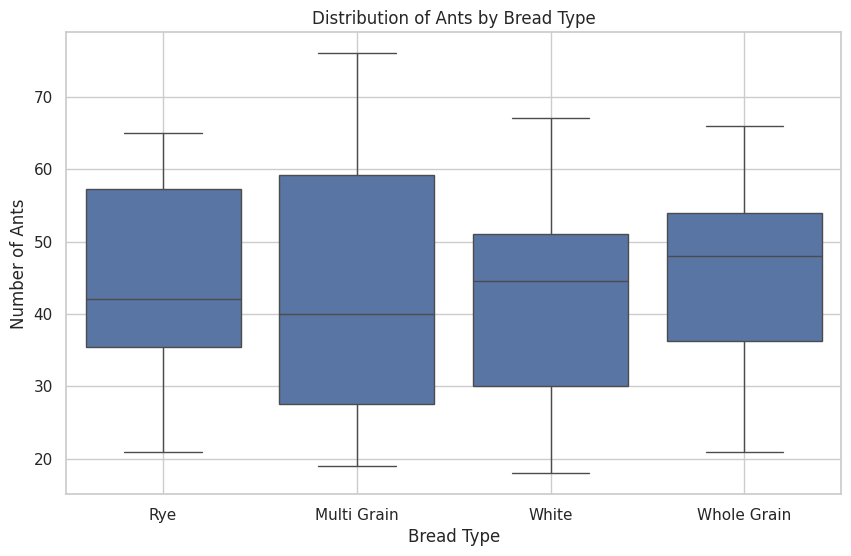

In [45]:
# Boxplot: Ants attracted by Bread type
plt.figure(figsize=(10,6))
sns.boxplot(x='bread', y='antCount', data=df) # Changed 'ants' to 'antCount'
plt.title('Distribution of Ants by Bread Type')
plt.xlabel('Bread Type')
plt.ylabel('Number of Ants')
plt.grid(True)
plt.savefig('boxplot_bread.png')
plt.show()



















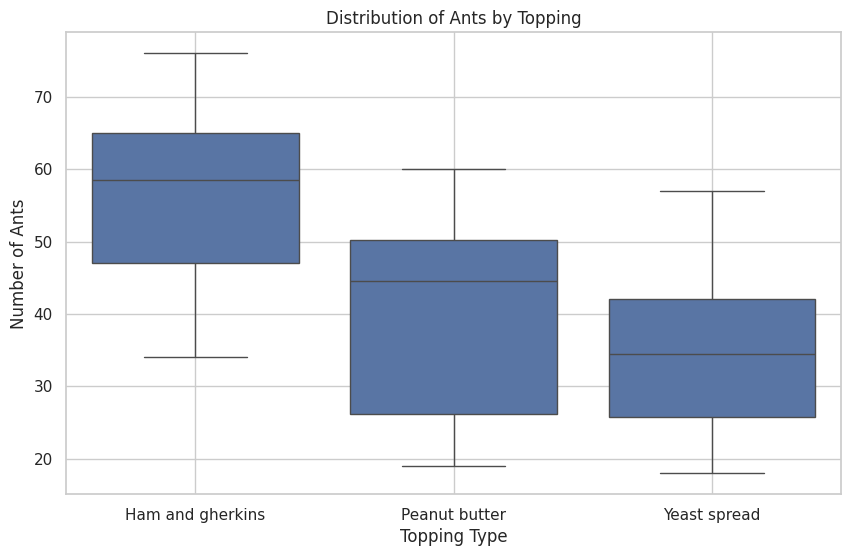

In [47]:
# Boxplot: Ants attracted by Topping
plt.figure(figsize=(10,6))
sns.boxplot(x='topping', y='antCount', data=df)
plt.title('Distribution of Ants by Topping')
plt.xlabel('Topping Type')
plt.ylabel('Number of Ants')
plt.grid(True)
plt.savefig('boxplot_topping.png')
plt.show()

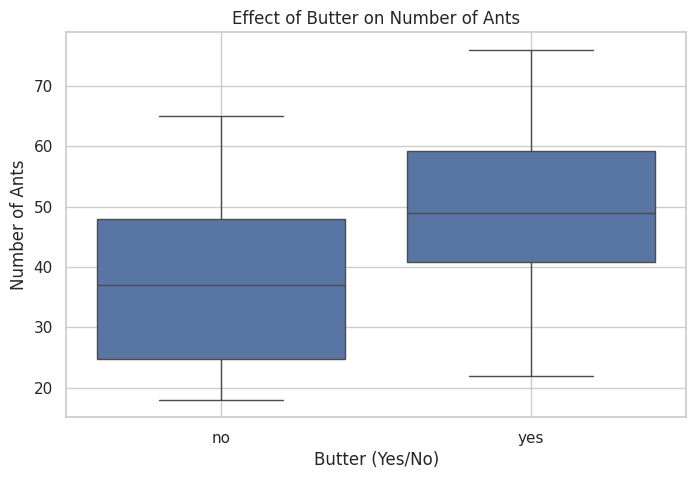

In [48]:
# Boxplot: Ants attracted by Butter
plt.figure(figsize=(8,5))
sns.boxplot(x='butter', y='antCount', data=df)
plt.title('Effect of Butter on Number of Ants')
plt.xlabel('Butter (Yes/No)')
plt.ylabel('Number of Ants')
plt.grid(True)
plt.savefig('boxplot_butter.png')
plt.show()

In [40]:
model_bread = ols('antCount ~ C(bread)', data=df).fit()
anova_bread = sm.stats.anova_lm(model_bread, typ=2)
print(anova_bread)

           sum_sq    df         F    PR(>F)
C(bread)     40.5   3.0  0.055279  0.982674
Residual  10745.5  44.0       NaN       NaN


In [41]:
# ANOVA for Topping
model_topping = ols('antCount ~ C(topping)', data=df).fit()
anova_topping = sm.stats.anova_lm(model_topping, typ=2)
print(anova_topping)

            sum_sq    df          F    PR(>F)
C(topping)  3720.5   2.0  11.847888  0.000074
Residual    7065.5  45.0        NaN       NaN


In [42]:
# ANOVA for Butter
model_butter = ols('antCount ~ C(butter)', data=df).fit()
anova_butter = sm.stats.anova_lm(model_butter, typ=2)
print(anova_butter)

            sum_sq    df         F   PR(>F)
C(butter)  1386.75   1.0  6.786765  0.01233
Residual   9399.25  46.0       NaN      NaN
